In [2]:
import sys
curr_dir = '/user_data/vayzenbe/GitHub_Repos/bwoc'
sys.path.insert(0, curr_dir)
import pandas as pd
from nilearn import image, plotting, input_data, glm, maskers
#from nilearn.glm import threshold_stats_img
import numpy as np


import nibabel as nib
from nilearn.maskers import NiftiSpheresMasker, NiftiMasker

import os
import statsmodels.api as sm
from nilearn.datasets import load_mni152_brain_mask, load_mni152_template
import matplotlib.pyplot as plt
import pdb
from scipy.stats import gamma
import warnings

import bwoc_params as params

warnings.filterwarnings('ignore')

/home/vayzenbe/anaconda3/envs/fmri/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [12]:
rois = ['lPPC', 'rPPC', 'lAPC','rAPC', 'lLO','rLO', 'lPFS', 'rPFS']


results_dir = f'/{curr_dir}/results'

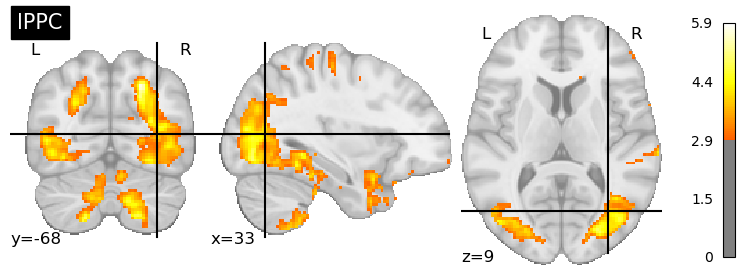

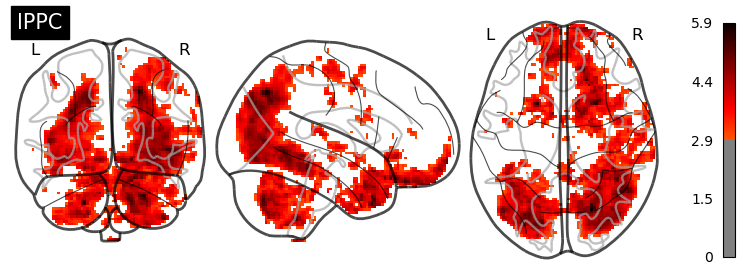

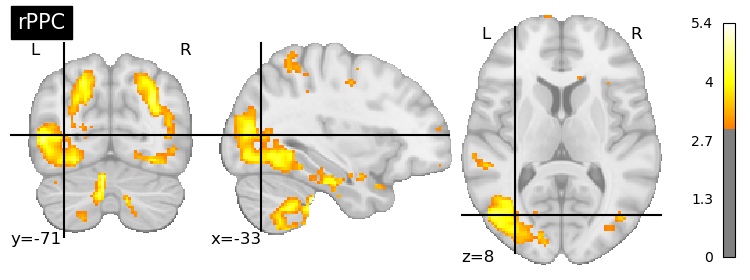

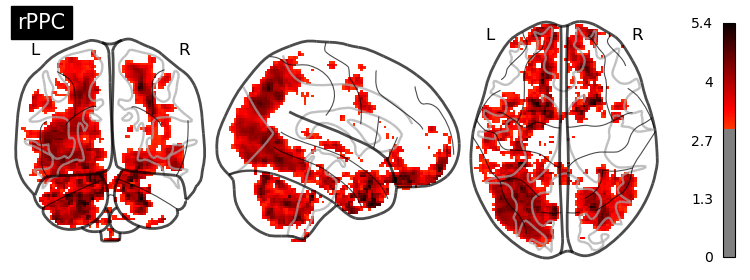

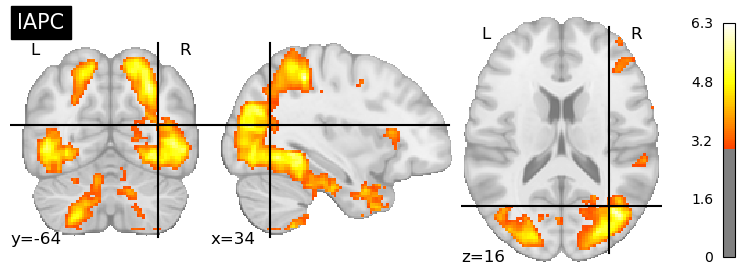

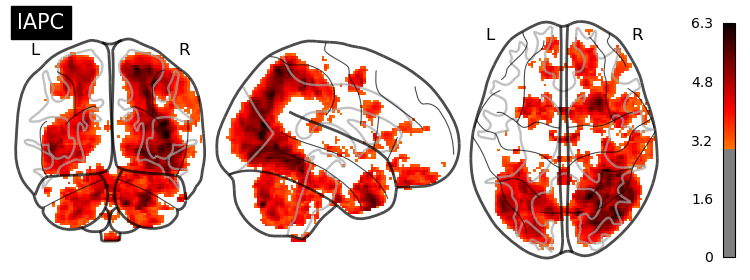

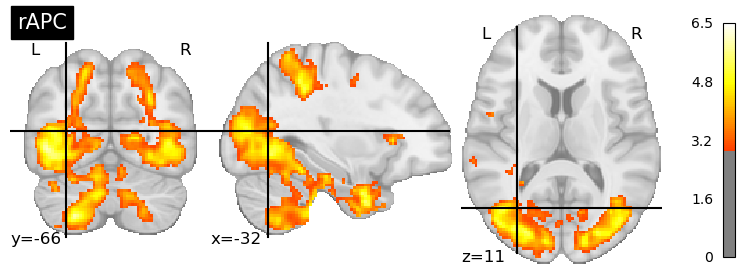

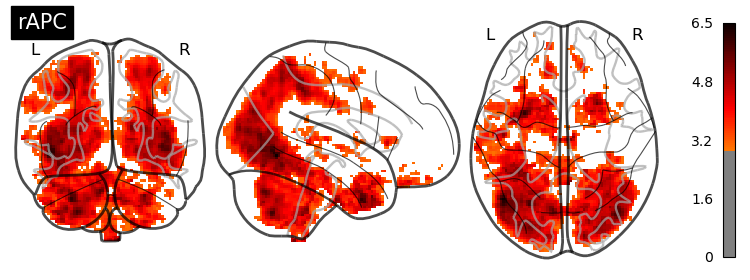

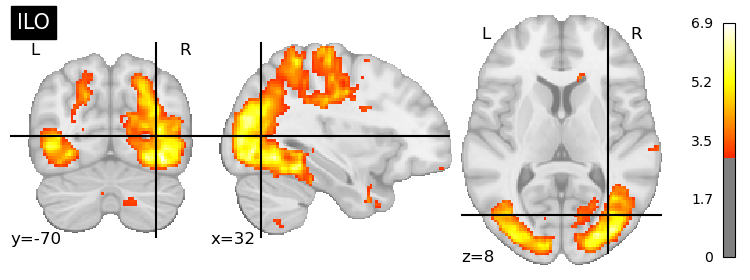

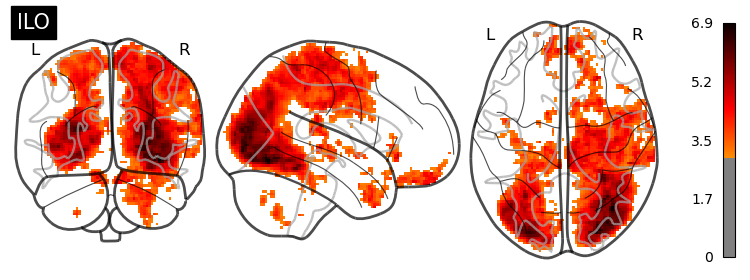

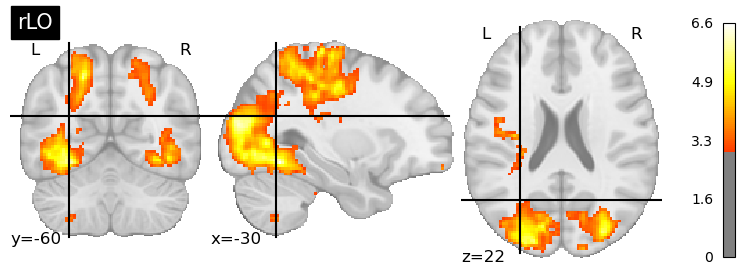

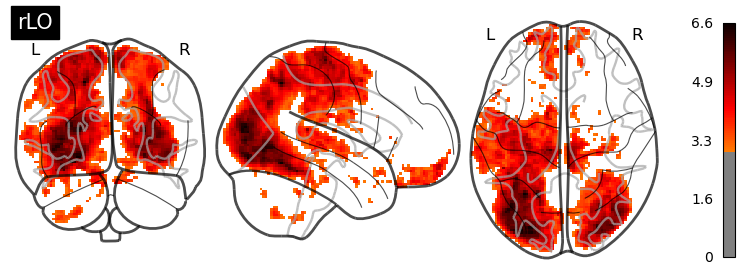

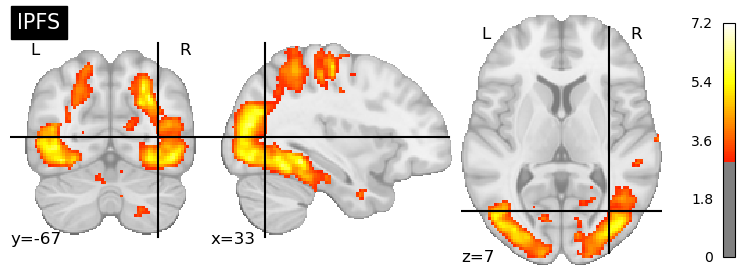

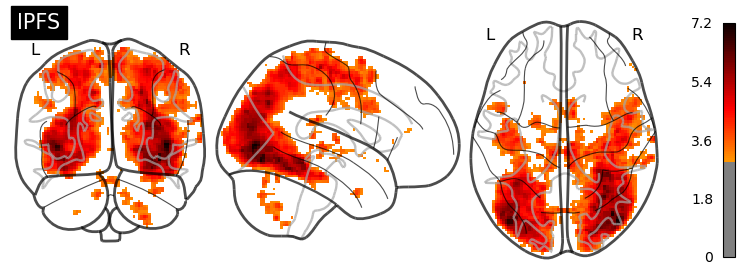

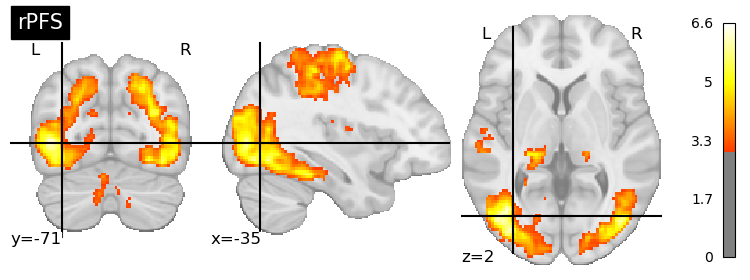

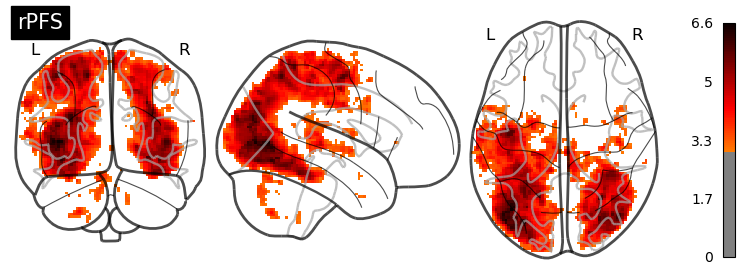

In [16]:
'''plot FC results on glass'''

file_suf = '_dist'
for roi in rois:
    #load roi FC data
    fc_data = image.load_img(f'{results_dir}/fc/{roi}_toolloc_fc_z{file_suf}.nii.gz')

    #threshold data at 3
    fc_data = image.math_img('np.where(img>3, img, 0)', img=fc_data)

    #Plot stat map
    plotting.plot_stat_map(fc_data,threshold=3, title= roi, colorbar=True,)
    #plot on glass brain
    plotting.plot_glass_brain(fc_data,threshold=3, title= roi, colorbar=True)
    plt.show()
    


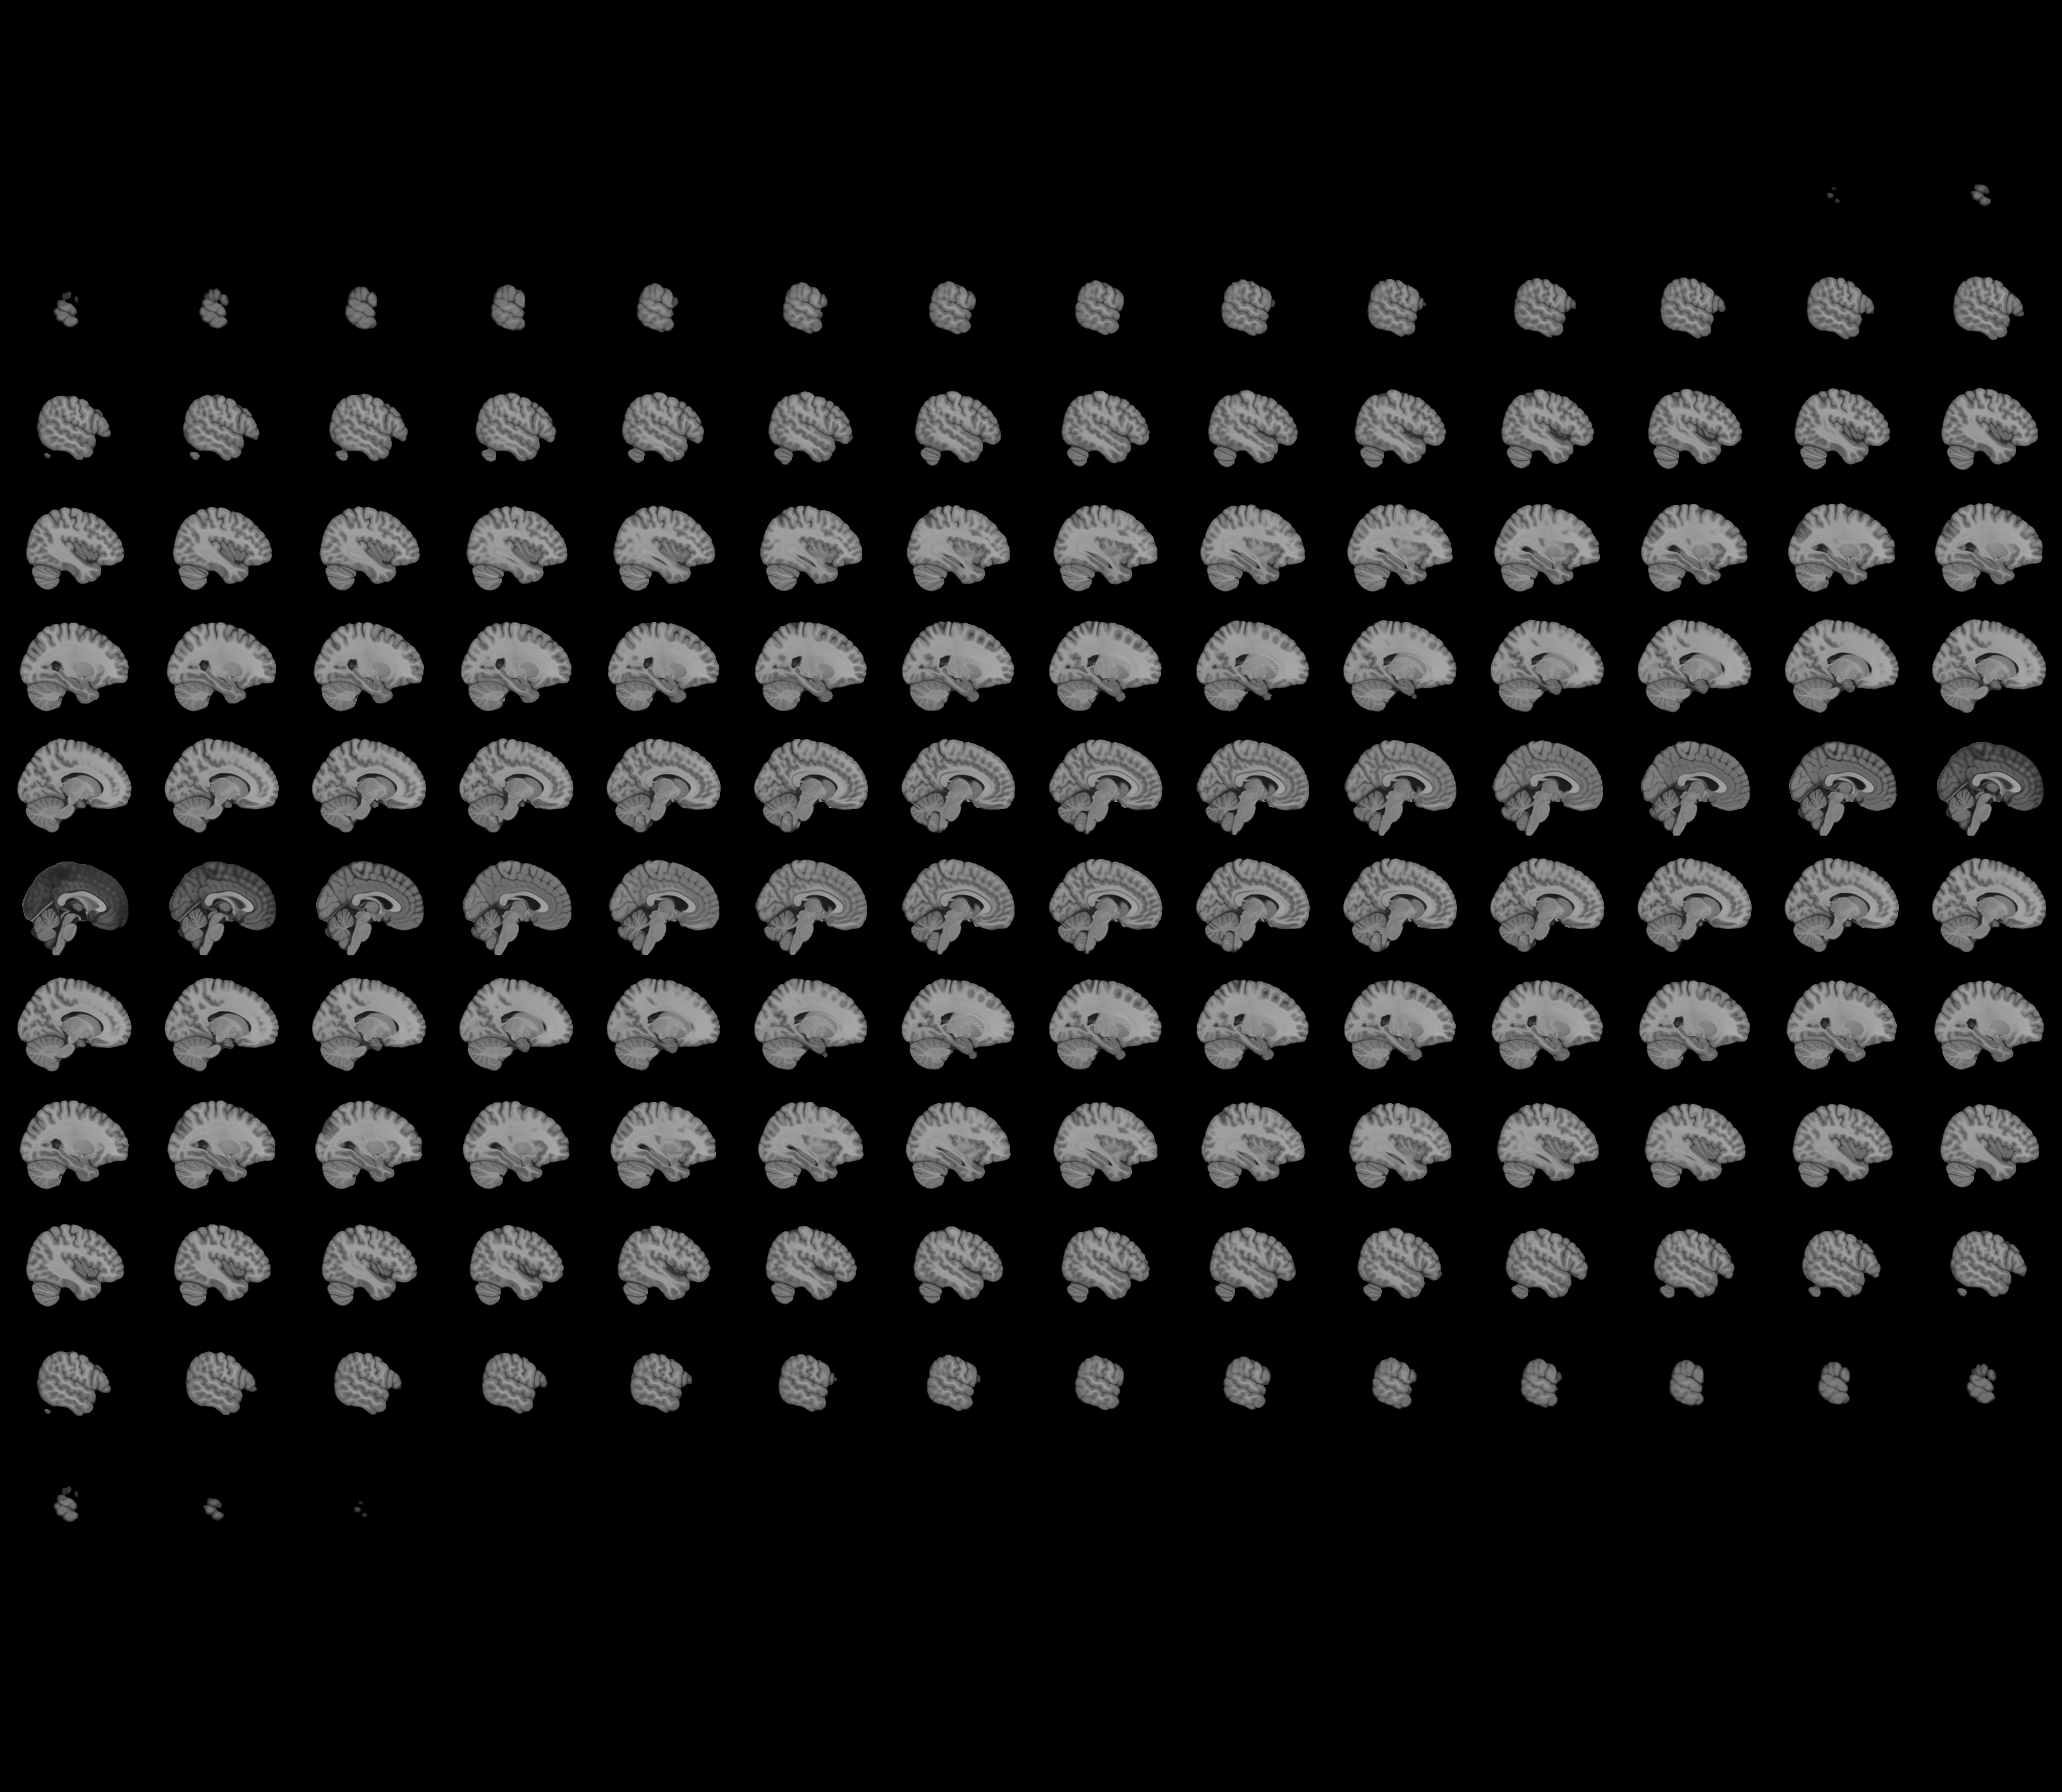
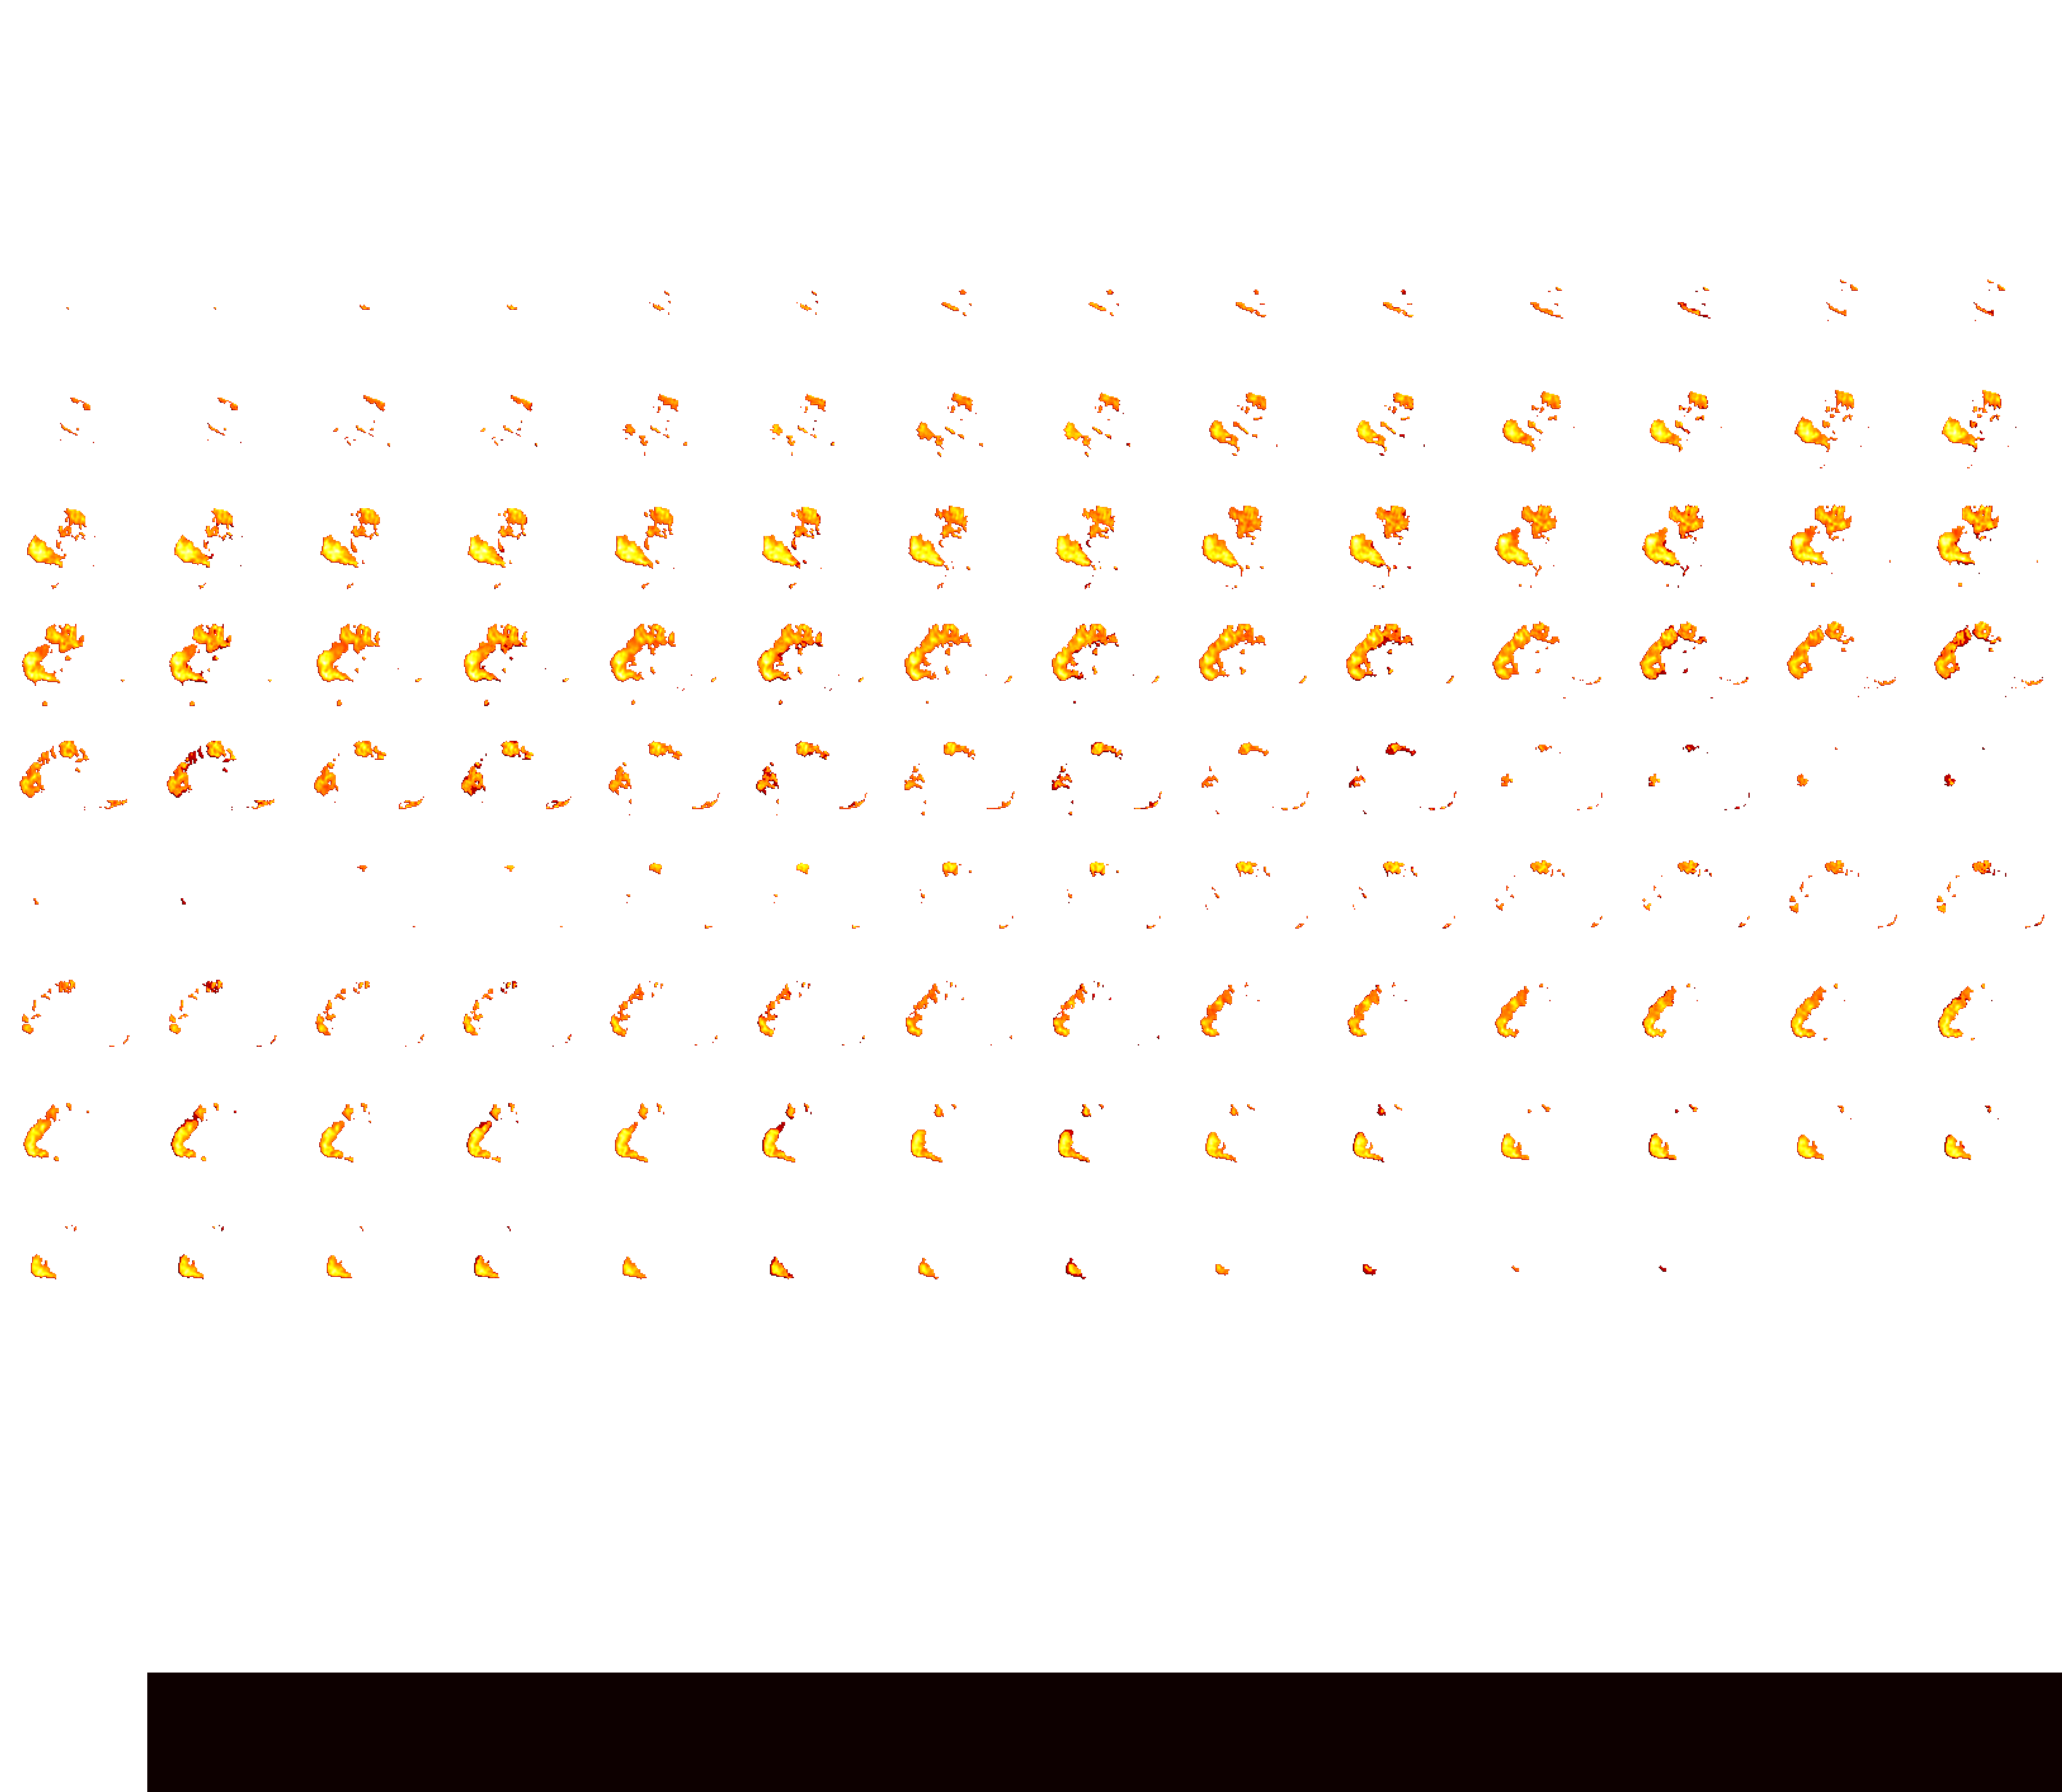

In [22]:
roi = 'rLO'
file_suf = '_dist'
#load roi FC data
fc_data = image.load_img(f'{results_dir}/fc/{roi}_toolloc_fc_z{file_suf}.nii.gz')
#threshold data at 3
fc_data = image.math_img('np.where(img>3, img, 0)', img=fc_data)
#plot interactive
plotting.view_img(fc_data, threshold=3, title=roi)

In [58]:
mni = image.load_img('/opt/fsl/6.0.3/data/standard/MNI152_T1_2mm_brain.nii.gz')
mni_mask = image.load_img('/opt/fsl/6.0.3/data/standard/MNI152_T1_2mm_brain_mask.nii.gz')
curr_run = image.load_img(f'{exp_dir}/run-01/1stLevel.feat/filtered_func_data_reg.nii.gz')
coords = [-41.44710979022727,-78.10511694881536,0.9369387379952628]
np_coords = [int(65.72355489511364), int(23.947441525592318), int(36.46846936899763)]
roi_masker = NiftiSpheresMasker([tuple(coords)], radius = 1)

In [68]:
blank_img = image.get_data(image.new_img_like(mni, np.zeros(mni.shape)))
mni_mask_np = image.get_data(mni_mask)

for i in range(blank_img.shape[0]):
    for j in range(blank_img.shape[1]):
        for k in range(blank_img.shape[2]):
            #calculate distance between np_coords and current voxel
            dist = np.sqrt((i-np_coords[0])**2 + (j-np_coords[1])**2 + (k-np_coords[2])**2)
            if mni_mask_np[i,j,k] == 1:
                #assign value to blank_img
                blank_img[i,j,k] = dist
            else:
                continue


dist_img = nib.Nifti1Image(blank_img, mni.affine, mni.header)



In [53]:
import numpy as np

# create a 3D numpy array
arr = np.array([
  [[1, 2, 3], [4, 5, 6]],
  [[7, 8, 9], [10, 11, 12]]
])

# choose a point in the array
point = arr[0][0]

# calculate the Euclidean distance between the chosen point and every other point in the array
distances = np.linalg.norm(arr - point, axis=-1)

print(distances)

[[ 0.          5.19615242]
 [10.39230485 15.58845727]]


In [54]:
dist = np.linalg.norm(np.array(idx1) - np.array(idx2))

print(dist)


array([1, 2, 3])

In [ ]:
def calc_distance(loc_df):
    """
    function to calculate the distance between the peak voxel and every other voxel in the localizer data
    
    As input, takes:
    a pandas dataframe
    
    """
    peak_vox = loc_df.iloc[0,0:3]

    all_coords = loc_df.iloc[:,0:3]

    dist = all_coords[['x', 'y', 'z']].sub(np.array(peak_vox)).pow(2).sum(1).pow(0.5)
    return dist

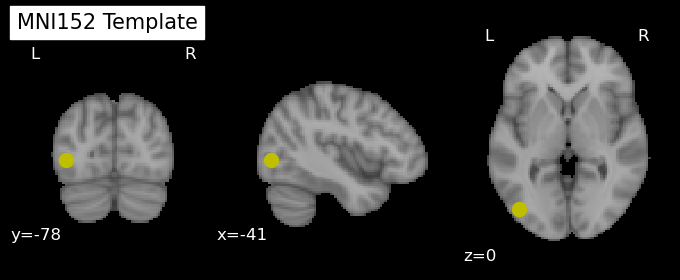

In [48]:
display = plotting.plot_anat(mni, cut_coords=coords, title='MNI152 Template', draw_cross=False)
display.add_markers([tuple(coords)], marker_color='y', marker_size=100)

In [49]:
blank_img = image.new_img_like(mni, np.zeros(mni.shape))

np_img = image.get_data(blank_img)
np_img[np_coords[0], np_coords[1], np_coords[2]] = 5

test_img = nib.Nifti1Image(np_img, mni.affine)

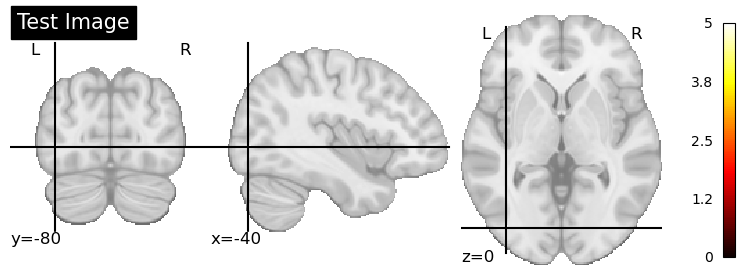

In [52]:
plotting.plot_stat_map(test_img, threshold=0, title='Test Image', draw_cross=True)

In [29]:
roi_masker = NiftiSpheresMasker([tuple(coords)], radius = 1)

In [30]:
roi = roi_masker.fit(curr_run)
roi_data =roi_masker.fit_transform(curr_run)

In [33]:
dir(roi)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_check_feature_names',
 '_check_fitted',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'allow_overlap',
 'detrend',
 'dtype',
 'fit',
 'fit_transform',
 'get_params',
 'high_pass',
 'high_variance_confounds',
 'inverse_transform',
 'low_pass',
 'mask_img',
 'memory',
 'memory_level',
 'n_elements_',
 'radius',
 'seeds',
 'seeds_',
 'set_output',
 'set_params',
 'smoothing_fwhm',
 'standardize',
 'standardize_confounds'

In [23]:
plotting.view_img(roi.mask_img_, threshold=0.5)

AttributeError: 'NiftiSpheresMasker' object has no attribute 'mask_img_'

In [28]:
curr_run.shape

(91, 109, 91, 331)

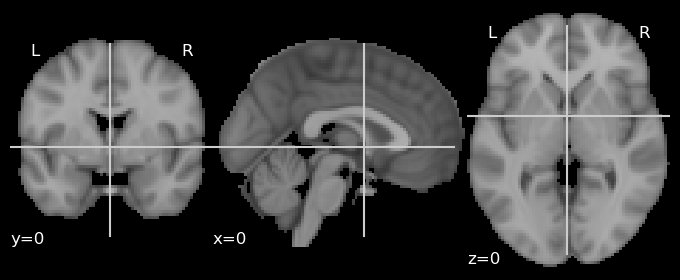

In [22]:
plotting.plot_roi(roi.mask_img, bg_img=mni)